# Phase 0: Intro

For this assignment, you'll be given a dataset containing some features of a group of people. Given those features, you will try to predict how much they tend to spend on the medical services they receive.

In [1]:
# libraries that you allowed to use
import os
import pandas
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

# Phase 1: Explore

## Sec 1: Load and Explore 

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe.

In [2]:
data = pd.read_csv(r"D:\Sharif University of Tech\AI Boot Camp\HW4\SLR\Data\train.csv")

Print the names of the columns and the number of rows of the dataset 

In [3]:
print(data.columns)
print(len(data))

Index(['Unnamed: 0', 'ID', 'age', 'sex', 'bmi', 'children', 'smk', 'region',
       'target'],
      dtype='object')
1070


Get a brief description of the dataset 

In [4]:
print(data.describe())
print("\nhere is the head of the data")
print(data.head())

        Unnamed: 0           ID          age          bmi     children  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean    534.500000   535.500000    39.357009    30.560397     1.107477   
std     309.026698   309.026698    14.073960     6.043386     1.215983   
min       0.000000     1.000000    18.000000    15.960000     0.000000   
25%     267.250000   268.250000    27.000000    26.205000     0.000000   
50%     534.500000   535.500000    39.500000    30.210000     1.000000   
75%     801.750000   802.750000    51.000000    34.496250     2.000000   
max    1069.000000  1070.000000    64.000000    53.130000     5.000000   

             target  
count   1070.000000  
mean   13346.089736  
std    12019.510778  
min     1121.873900  
25%     4897.667387  
50%     9575.442100  
75%    16746.657400  
max    62592.873090  

here is the head of the data
   Unnamed: 0  ID  age     sex    bmi  children smk     region       target
0           0   1   46  femal

Check for missing values in the dataset 

In [5]:
#check for missing values
print("=====================\ncheck for nan values")
print(data.isna().any())
print("=====================\ncheck for null values")
print(data.isnull().any())

print("There is no missing data")

check for nan values
Unnamed: 0    False
ID            False
age           False
sex           False
bmi           False
children      False
smk           False
region        False
target        False
dtype: bool
check for null values
Unnamed: 0    False
ID            False
age           False
sex           False
bmi           False
children      False
smk           False
region        False
target        False
dtype: bool
There is no missing data


Use Histograms and Box-plots to visualize the distribution of numerical columns 

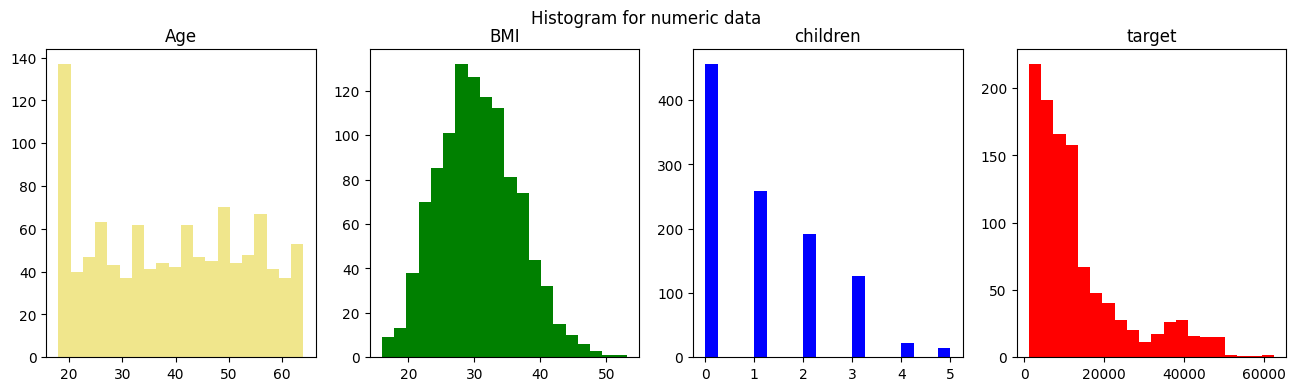

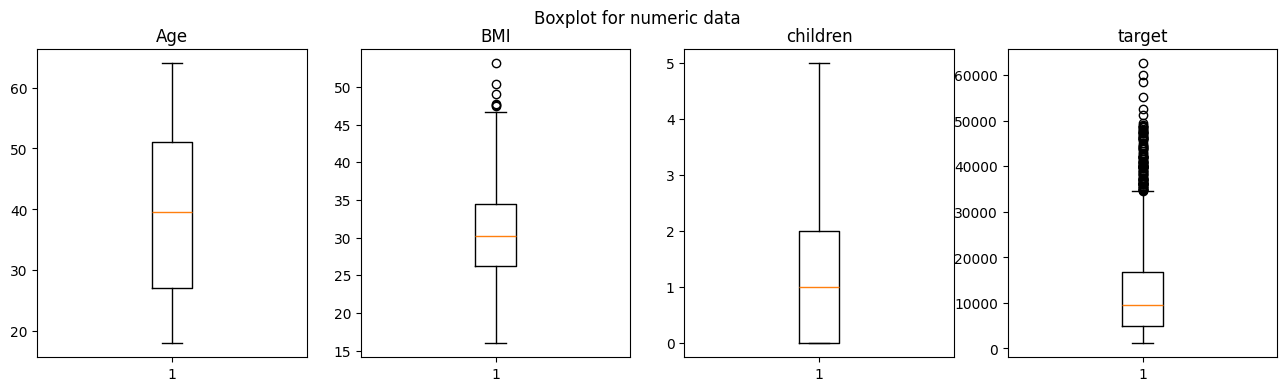

In [6]:
# histogram for age
# size of the plt figure
plt.figure(figsize=(16,4))
# set name for the whole figure
plt.suptitle("Histogram for numeric data")
# here we make 4 hist plots using plt axis
plt.subplot(1,4,1)
plt.hist(data['age'],bins = 20,
                            color ='khaki')
plt.title("Age")
plt.subplot(1,4,2)
plt.hist(data['bmi'],bins = 20,
                            color ='green')
#set title for the plot
plt.title("BMI")
plt.subplot(1,4,3)
plt.hist(data['children'],bins = 20,
                            color ='blue')
plt.title("children")
plt.subplot(1,4,4)
plt.hist(data['target'],bins = 20,
                            color ='red')
plt.title("target")
plt.show()

# plt boxplot
plt.figure(figsize=(16,4))
# set name for the whole figure
plt.suptitle("Boxplot for numeric data")
# here we make 4 hist plots using plt axis
plt.subplot(1,4,1)
#plot with edge color green
plt.boxplot(data['age'])
plt.title("Age")
plt.subplot(1,4,2)
plt.boxplot(data['bmi'])
plt.title("BMI")
plt.subplot(1,4,3)
plt.boxplot(data['children'])
plt.title("children")
plt.subplot(1,4,4)
plt.boxplot(data['target'])
plt.title("target")
plt.show()

Count the number of unique values for each class in categorical columns and compare the distributions amongst them 

In [7]:
# count unique values in categorical columns
print("Here is the number of unique values in each column\n")
print(data.nunique())
print("=======================\n")
# Here is the code for print number of each value in categorical columns
print("The distribution of each value in categorical columns\n")
GroupedData=data.groupby(by='smk').size()
print(GroupedData)
print("=======================")

Here is the number of unique values in each column

Unnamed: 0    1070
ID            1070
age             47
sex              2
bmi            494
children         6
smk              2
region           4
target        1070
dtype: int64

The distribution of each value in categorical columns

smk
no     850
yes    220
dtype: int64


In [8]:
GroupedData = data.groupby(by='sex').size()
print(GroupedData)
print("=======================")
GroupedData = data.groupby(by='region').size()
print(GroupedData)
print("=======================")

sex
female    522
male      548
dtype: int64
region
northeast    267
northwest    256
southeast    283
southwest    264
dtype: int64


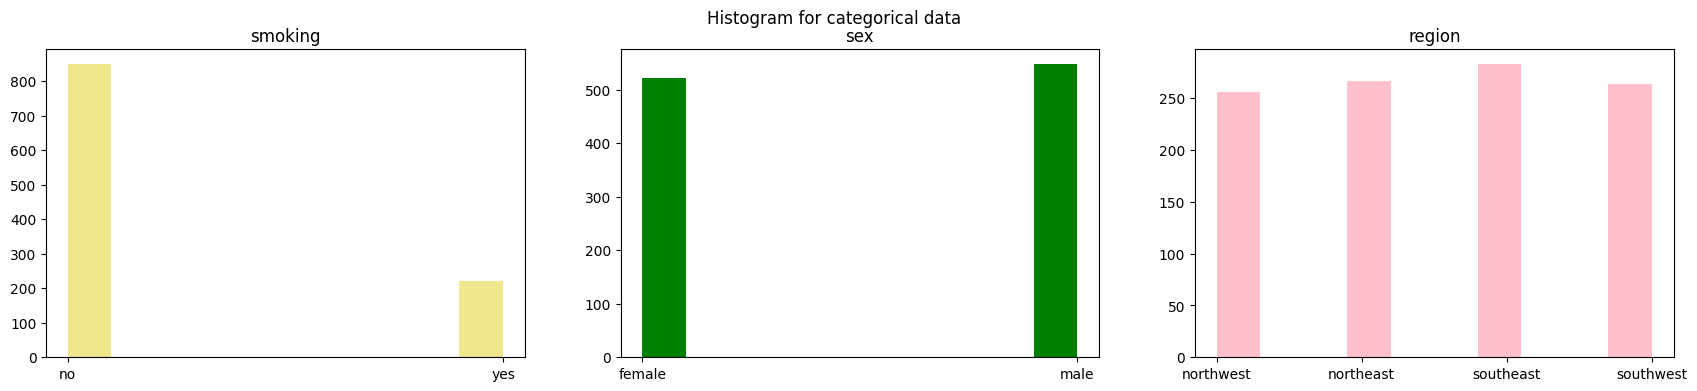

In [9]:
# print here I draw the histogram of categorical data
plt.figure(figsize=(21,4))
# set name for the whole figure
plt.suptitle("Histogram for categorical data")
# here we make 4 hist plots using plt axis
plt.subplot(1,3,1)
plt.hist(data['smk'],color ='khaki')
plt.title("smoking")
plt.subplot(1,3,2)
plt.hist(data['sex'],color="green")
plt.title("sex")
plt.subplot(1,3,3)
plt.hist(data['region'],color="pink")
plt.title("region")
plt.show()

Convert columns with string values (`sex`, `smk`, and `region`) into numerical values 

In [10]:
# code from scratch :)
sex = pd.factorize(data["sex"])[0]
smoker = pd.factorize(data["smk"])[0]
region = pd.factorize(data["region"])[0]
data = data.drop(["sex","smk","region"],axis=1)
data["sex"]=sex
data["smk"]=smoker
data["region"]=region
data.head()

,Unnamed: 0,ID,age,bmi,children,target,sex,smk,region
0,0,1,46,19.95,2,9193.83850,0,0,0
1,1,2,47,24.32,0,8534.67180,0,0,1
2,2,3,52,24.86,0,27117.99378,0,0,2
3,3,4,39,34.32,5,8596.82780,0,0,2
4,4,5,54,21.47,3,12475.35130,0,0,0


In [11]:
# using LabelEncoder
from sklearn.preprocessing import LabelEncoder
sex_enc = sklearn.preprocessing.LabelEncoder()
data["sex"] = sex_enc.fit_transform(data["sex"])
smk_enc = sklearn.preprocessing.LabelEncoder()
data["smk"] = smk_enc.fit_transform(data["smk"])
region_enc = sklearn.preprocessing.LabelEncoder()
data["region"] = region_enc.fit_transform(data["region"])
data.head()

,Unnamed: 0,ID,age,bmi,children,target,sex,smk,region
0,0,1,46,19.95,2,9193.83850,0,0,0
1,1,2,47,24.32,0,8534.67180,0,0,1
2,2,3,52,24.86,0,27117.99378,0,0,2
3,3,4,39,34.32,5,8596.82780,0,0,2
4,4,5,54,21.47,3,12475.35130,0,0,0


## Sec 2: Check for linear relation 

Plot `age` and `smk` against `target` 

plotting the mean


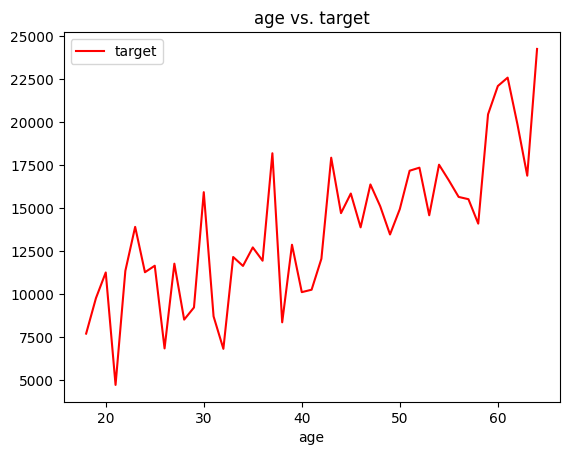

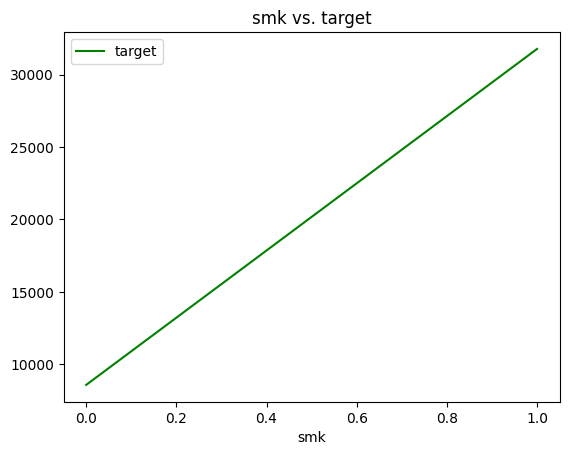

The smk one is linear 
Here I draw the sctter too


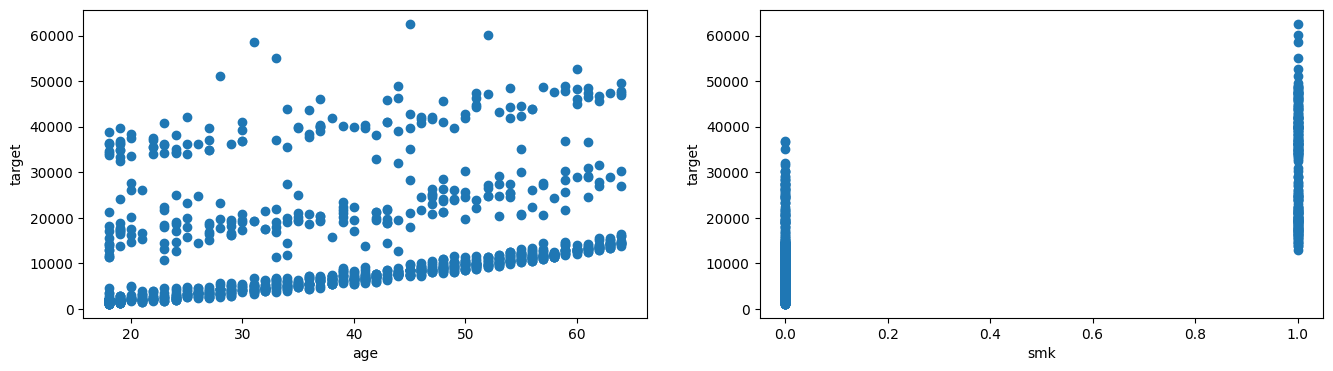

In [12]:
print("plotting the mean")
data.groupby('age').mean().reset_index().plot(x='age',y='target',title='age vs. target',color="Red")

data.groupby('smk').mean().reset_index().plot(x='smk',y='target',title='smk vs. target',color="Green")
plt.show()

print("The smk one is linear \nHere I draw the sctter too")
# plot age and smk against target
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.scatter(data["age"],data["target"])
plt.xlabel("age")
plt.ylabel("target")
plt.subplot(1,2,2)
plt.scatter(data["smk"],data["target"])
plt.xlabel("smk")
plt.ylabel("target")
plt.show()


Plot the correlation matrix for numerical features 

          children       age       bmi    target
children  1.000000  0.060999 -0.005040  0.071885
age       0.060999  1.000000  0.118274  0.281721
bmi      -0.005040  0.118274  1.000000  0.197316
target    0.071885  0.281721  0.197316  1.000000


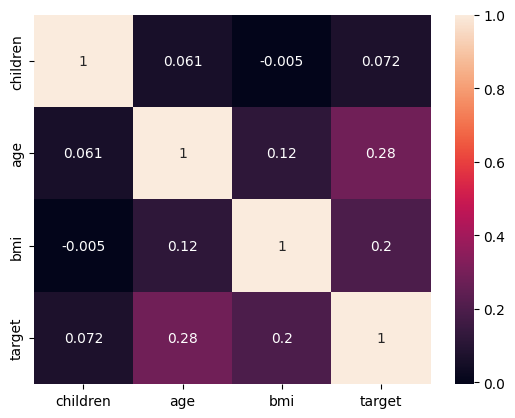

Here is the full correlation matrix
            Unnamed: 0        ID       age       bmi  children    target  \
Unnamed: 0    1.000000  1.000000 -0.035986 -0.031264 -0.035025 -0.032398   
ID            1.000000  1.000000 -0.035986 -0.031264 -0.035025 -0.032398   
age          -0.035986 -0.035986  1.000000  0.118274  0.060999  0.281721   
bmi          -0.031264 -0.031264  0.118274  1.000000 -0.005040  0.197316   
children     -0.035025 -0.035025  0.060999 -0.005040  1.000000  0.071885   
target       -0.032398 -0.032398  0.281721  0.197316  0.071885  1.000000   
sex          -0.030145 -0.030145 -0.008459  0.015293  0.017080  0.056802   
smk          -0.024758 -0.024758 -0.052035 -0.003450  0.013994  0.780063   
region       -0.066868 -0.066868  0.006363  0.150175 -0.024802  0.012671   

                 sex       smk    region  
Unnamed: 0 -0.030145 -0.024758 -0.066868  
ID         -0.030145 -0.024758 -0.066868  
age        -0.008459 -0.052035  0.006363  
bmi         0.015293 -0.003450 

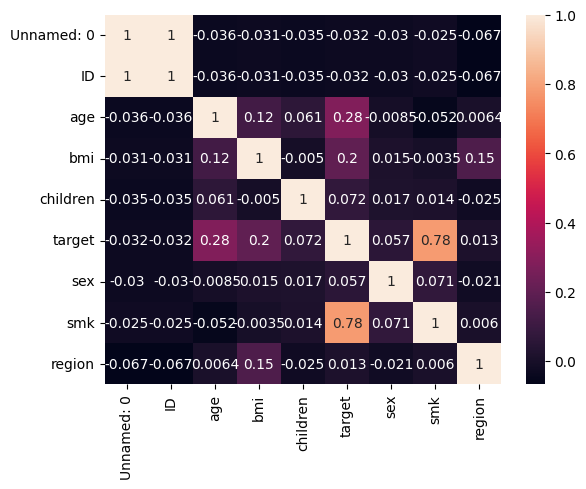

In [13]:
# get the dataframe of children,age,bmi,target
numerical_features = data[["children","age","bmi","target"]]
corr = numerical_features.corr()
print(corr)
sns.heatmap(corr,annot=True)
plt.show()
print("Here is the full correlation matrix")
corr = data.corr()
print(corr)
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0)
plt.show()


# Phase 2: Preprocessing

## Sec 1: Handling Categorical Variables

Using one-hot encoding, convert the `region` variable to some numerical variables (the result should be a dataframe)
<br>
One-hot encoding is a method for converting categorical data to numerical ones that can be fed into a model. This method works by creating a binary vector for each category. **(P2-1-1: 5 points)**

In [14]:
region = pd.get_dummies(data['region'])
print(region.head())
data = pd.concat((data, region), axis=1)
data.drop(['region'], axis=1,inplace=True)

       0      1      2      3
0   True  False  False  False
1  False   True  False  False
2  False  False   True  False
3  False  False   True  False
4   True  False  False  False


Do the same thing for the `smoker` and `sex` variable (the result should be a dataframe)

In [15]:
sex = pd.get_dummies(data['sex'])
smoker = pd.get_dummies(data['smk'])
print(sex.head())
print(smoker.head())
data = pd.concat((data,sex,smoker),axis=1)
data.drop(['sex','smk'],axis=1,inplace=True)

      0      1
0  True  False
1  True  False
2  True  False
3  True  False
4  True  False
      0      1
0  True  False
1  True  False
2  True  False
3  True  False
4  True  False


In [16]:
data.head()

,Unnamed: 0,ID,age,bmi,children,target,0,1,2,3,0,1,0,1
0,0,1,46,19.95,2,9193.83850,True,False,False,False,True,False,True,False
1,1,2,47,24.32,0,8534.67180,False,True,False,False,True,False,True,False
2,2,3,52,24.86,0,27117.99378,False,False,True,False,True,False,True,False
3,3,4,39,34.32,5,8596.82780,False,False,True,False,True,False,True,False
4,4,5,54,21.47,3,12475.35130,True,False,False,False,True,False,True,False


## Sec 2: Normalization 

Normalize the columns `age`, `bmi`, and `children`. After this process, they should take values between 0 and 1.

In [17]:
data['age'] = data['age'].apply(lambda x: (x-data['age'].min())/(data['age'].max()-data['age'].min()))
data['bmi'] = data['bmi'].apply(lambda x: (x-data['bmi'].min())/(data['bmi'].max()-data['bmi'].min()))
data['children'] = data['children'].apply(lambda x: (x-data['children'].min())/(data['children'].max()-data['children'].min()))

data.head()

,Unnamed: 0,ID,age,bmi,children,target,0,1,2,3,0,1,0,1
0,0,1,0.608696,0.107345,0.4,9193.83850,True,False,False,False,True,False,True,False
1,1,2,0.630435,0.224913,0.0,8534.67180,False,True,False,False,True,False,True,False
2,2,3,0.739130,0.239440,0.0,27117.99378,False,False,True,False,True,False,True,False
3,3,4,0.456522,0.493947,1.0,8596.82780,False,False,True,False,True,False,True,False
4,4,5,0.782609,0.148238,0.6,12475.35130,True,False,False,False,True,False,True,False


# Phase 3: Training

## Sec 1: Preparing features and Targets 

Extract only the features from the dataframe by removing the `target` column. <br>
Note: Do not remove the previous dataframe.

In [18]:
X = data.drop(['target'], axis=1)

Convert the new dataframe into a numpy array 

In [19]:
X = X.to_numpy()

Get the `target` column from the previous dataframe and convert it to another numpy array named `y` =

In [20]:
y = data['target'].to_numpy()

## Sec 2: Splitting the Data 

Split the dataset into two parts such that the training set (denoted as `x_train` and ‍`y_train`), contains 80% of the samples. 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

## Sec 3: Linear Regression from Scratch 

Complete this section with your code. 

In [23]:
class MyLinearRegression:
    def __init__(self,lamda=0):
        self.weights = None
        self.lamda = lamda


    def fit(self, X, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values

        No Returns
        """
        X = np.float64(np.hstack((np.ones((X.shape[0],1)),X)))
        regulizer =  np.float64(self.lamda*np.identity(X.shape[1]))
        self.weights = np.linalg.pinv(X.T.dot(X)+regulizer).dot(X.T).dot(y)
        return self

    def predict(self, X):
        """ Predicts the values after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted values
        """
        X = np.float64(np.hstack((np.ones((X.shape[0],1)),X)))
        y_predict = X.dot(self.weights)
        return y_predict

## Sec 4: Fit the model to training data 

Fit a linear regressor to the data. (Use both regressors - sklearn & from scratch) 

In [24]:
model = MyLinearRegression().fit(x_train, y_train)

In [25]:
from sklearn.linear_model import LinearRegression
skmodel = LinearRegression().fit(x_train, y_train)

Get the coefficients of the variables (sklearn) 

In [26]:
print(skmodel.coef_)

[ 1.72260397e-01  1.72260397e-01  1.14168947e+04  1.24748764e+04
  1.88152845e+03 -2.60506248e+01  5.17520952e+02 -1.38526637e+02
 -3.52943690e+02  1.25104428e+02 -1.25104428e+02 -1.19409740e+04
  1.19409740e+04]


In [27]:
model.weights

array([  3480.55847904,  -1740.10698215,   1740.45150294,  11416.89473953,
        12474.87642115,   1881.52844942,    844.08899491,   1387.66057145,
          731.61298258,    517.1959301 ,   1865.38366764,   1615.17481141,
       -10200.69473047,  13681.25320952])

Get the score value of sklearn regressor on train dataset (sklearn) 

In [28]:
skmodel.score(x_train, y_train)

0.7543280392265508

# Phase 4: Evaluation

## Sec 1: Evaluate both models and compare the results 

Predict the value of "y" for each "x" belonging to the "testing" set (use both regressors)

In [29]:
sk_prediction = skmodel.predict(x_test)
my_prediction = model.predict(x_test)

Compute the mean squared error 

In [30]:

from sklearn.metrics import mean_squared_error
sk_mse = mean_squared_error(y_test, sk_prediction)
my_mse = mean_squared_error(y_test, my_prediction)
print(sk_mse)
print(my_mse)

40671659.8355266
40671659.83575531


Calculate the maximum error for each regressor 

In [31]:
print(max(np.abs(sk_prediction-y_test)))
print(max(np.abs(my_prediction-y_test)))

24497.679721953275
24497.67972167747
